### Bussines Understandig

- **Which neighborhood is the most expensive in terms of renting price?**
- **Is Airbnb Madrid used mainly by owners or people managing different appartments?**
- **How well can we predict the renting price? What aspects correlate well to price?**



### Data Understandig

In [1]:
#import all necessary librery

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load all realted datasets

df_listings=pd.read_csv('listings_m.csv')
df_listings_summary=pd.read_csv('listings.csv')
df_calendar=pd.read_csv('calendar_m.csv')
df_neighbourhoods=pd.read_csv('neighbourhoods_m.csv')
df_reviews=pd.read_csv('reviews_m.csv')

In [3]:
#let's have a look at the listing dataframe

df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20190308052744,2019-03-08,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,Nice and definitely non touristic neighborhoo...,...,f,f,flexible,f,f,1,0,1,0,0.55
1,21853,https://www.airbnb.com/rooms/21853,20190308052744,2019-03-08,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.61
2,24805,https://www.airbnb.com/rooms/24805,20190308052744,2019-03-08,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",LOCATION. Brand new flats near the Atlantic H...,"Studio located 50 meters from Gran Via, next t...",none,"The area is next to the Gran Via, so people li...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.04
3,24836,https://www.airbnb.com/rooms/24836,20190308052744,2019-03-08,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",none,"Cosmopolita, lleno de locales de moda, restaur...",...,f,f,moderate,f,f,1,1,0,0,0.57
4,26825,https://www.airbnb.com/rooms/26825,20190308052744,2019-03-08,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,none,"Es un barrio muy tranquilo, en una zona de Mad...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,1.17


In [4]:
#list all the feature of the listings dataframe with varible type.
df_listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17656 entries, 0 to 17655
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url 

We see that the dataset has 17656 entries and 106 columns. There are a lot of features which are not usefull for our study so we are going to createa new datafame with the most interesting features for us. 

In [5]:
variables = ['id','host_id','listing_url','neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','property_type',
             'room_type','accommodates','bathrooms', 'bedrooms','beds','bed_type','amenities','square_feet','price',
             'security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights',
             'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
             'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
             'cancellation_policy','reviews_per_month','host_is_superhost']

df_list_short= df_listings[variables]

As we are going to work with the price, we are going to clean this field by converting to float type and also to fill the missing values with 0 USD. Note that there is only missing values in the cleaning_fee and security_deposit so after checking some listing urls we will make the assumption that it could be 0 usd in all of them. 

In [6]:
df_list_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17656 entries, 0 to 17655
Data columns (total 34 columns):
id                              17656 non-null int64
host_id                         17656 non-null int64
listing_url                     17656 non-null object
neighbourhood_cleansed          17656 non-null object
neighbourhood_group_cleansed    17656 non-null object
latitude                        17656 non-null float64
longitude                       17656 non-null float64
property_type                   17656 non-null object
room_type                       17656 non-null object
accommodates                    17656 non-null int64
bathrooms                       17643 non-null float64
bedrooms                        17651 non-null float64
beds                            17602 non-null float64
bed_type                        17656 non-null object
amenities                       17656 non-null object
square_feet                     320 non-null float64
price                     

Now we a have a dataframe with 34 columns.

As we are also going to try to know which area of the city is the most expensive area we will take the unitary price (price/maximun guests) which can give us a better idea of the pice average since we remove the varible size from the equation. 

In [7]:
#let's explore firt the variable guests_included.
df_list_short[['guests_included','beds','listing_url','price']].head(10)

,guests_included,beds,listing_url,price
0,2,0.0,https://www.airbnb.com/rooms/6369,$70.00
1,1,1.0,https://www.airbnb.com/rooms/21853,$17.00
2,2,2.0,https://www.airbnb.com/rooms/24805,$60.00
3,4,3.0,https://www.airbnb.com/rooms/24836,$115.00
4,1,1.0,https://www.airbnb.com/rooms/26825,$25.00
5,1,2.0,https://www.airbnb.com/rooms/30320,$65.00
6,1,1.0,https://www.airbnb.com/rooms/30711,$149.00
7,1,1.0,https://www.airbnb.com/rooms/30959,$54.00
8,2,3.0,https://www.airbnb.com/rooms/40718,$55.00
9,1,3.0,https://www.airbnb.com/rooms/40916,$90.00


we can see that there are mistakes or inconsistencies in this values. In order to minimize the error, We are going to equal the values guests_included and beds in case beds are bigger.

In [8]:
#Change the value of guests_included in case is lower than nº of beds
df_list_short.loc[df_list_short['guests_included'] < df_list_short['beds'], 'guests_included'] = df_list_short['beds']

In [9]:
df_list_short[['guests_included','beds','listing_url','price']].head(10)

,guests_included,beds,listing_url,price
0,2.0,0.0,https://www.airbnb.com/rooms/6369,$70.00
1,1.0,1.0,https://www.airbnb.com/rooms/21853,$17.00
2,2.0,2.0,https://www.airbnb.com/rooms/24805,$60.00
3,4.0,3.0,https://www.airbnb.com/rooms/24836,$115.00
4,1.0,1.0,https://www.airbnb.com/rooms/26825,$25.00
5,2.0,2.0,https://www.airbnb.com/rooms/30320,$65.00
6,1.0,1.0,https://www.airbnb.com/rooms/30711,$149.00
7,1.0,1.0,https://www.airbnb.com/rooms/30959,$54.00
8,3.0,3.0,https://www.airbnb.com/rooms/40718,$55.00
9,3.0,3.0,https://www.airbnb.com/rooms/40916,$90.00


In [10]:
#test if the change was made
(df_list_short['guests_included'] < df_list_short['beds']).any()

False

Now, we are going to clean the prices fields, since we need them to be numeric to make our exploration

In [11]:
list_prices=['price','security_deposit','cleaning_fee','extra_people']

for e in list_prices:
    df_list_short[e]=df_list_short[e].str.replace('$', "")
    df_list_short[e]=df_list_short[e].str.replace(',', "")
    df_list_short[e]=df_list_short[e].astype('float')
    

In [12]:
#imput value 0 in all missing values of 'cleaning_fee' and 'security_deposit'
df_list_short.fillna({'security_deposit': 0, 'cleaning_fee': 0}, inplace=True)

In [13]:
#I am going to create a new variable with unitary price per guest
df_list_short['guest_price']= (df_list_short['price']/ df_list_short['guests_included']).round(2)

In [14]:
#check the result
df_list_short[['price','guest_price','security_deposit','cleaning_fee','extra_people']].head(10)

,price,guest_price,security_deposit,cleaning_fee,extra_people
0,70.0,35.00,0.0,5.0,15.0
1,17.0,17.00,0.0,0.0,8.0
2,60.0,30.00,200.0,30.0,10.0
3,115.0,28.75,200.0,0.0,0.0
4,25.0,25.00,0.0,15.0,0.0
5,65.0,32.50,0.0,0.0,18.0
6,149.0,149.00,0.0,0.0,75.0
7,54.0,54.00,0.0,0.0,0.0
8,55.0,18.33,100.0,20.0,15.0
9,90.0,30.00,0.0,0.0,0.0


In [15]:
#let's see the statics summary of the guest price
df_list_short['guest_price'].describe()

count    17656.000000
mean        48.034557
std        144.363474
min          0.300000
25%         21.330000
50%         30.000000
75%         45.000000
max       8652.000000
Name: guest_price, dtype: float64

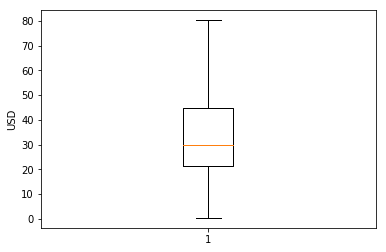

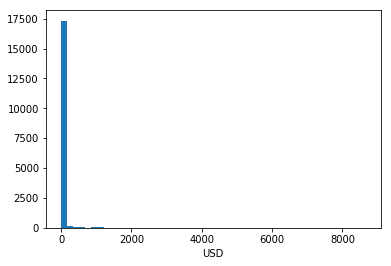

In [16]:
#box plot of prices without outliers

f = plt.figure(1)
plt.boxplot(df_list_short['guest_price'],showfliers=False)
plt.ylabel('USD')

f.show()

#Histogram of prices
g = plt.figure(2)
plt.hist(df_list_short['guest_price'],bins=50);
plt.xlabel('USD')
g.show()


Acc to the statics and the plots we can see that there are some outliers than can skewed the results so we are going to delete them.
A good bound might be between 10 and 400 USD so let's check whether how many data points we have outside this range.

In [17]:
#below 10 usd
df_list_short[df_list_short['guest_price']<10]['guest_price'].count()

377

In [18]:
#above 400 usd
df_list_short[df_list_short['guest_price']>400]['guest_price'].count()

176

This rows would be about 3% of the total so we can delete them without loosing so much information from the data

In [19]:
df_list_short_clean=df_list_short[(df_list_short['guest_price'] > 10) & (df_list_short['guest_price'] < 400)]

In [20]:
# display the statics summary of the neighbourhood_group_cleansed
s=df_list_short_clean[['guest_price','neighbourhood_group_cleansed']].groupby('neighbourhood_group_cleansed')\
.describe()
gp=s['guest_price'].sort_values(by=['mean'],ascending=False)
gp['std/mean']= gp['std']/gp['mean']
gp

,count,mean,std,min,25%,50%,75%,max,std/mean
neighbourhood_group_cleansed,,,,,,,,,
Salamanca,1141.0,47.209571,35.282371,10.50,25.000,37.000,60.0000,333.33,0.747356
Chamartín,452.0,43.559580,32.965450,11.00,24.000,33.330,50.0000,250.00,0.756790
Chamberí,934.0,41.330418,32.948534,10.67,25.000,32.585,48.4575,395.00,0.797198
Moncloa - Aravaca,506.0,40.899427,30.270601,10.83,24.000,33.415,50.0000,333.33,0.740123
Centro,8969.0,40.427950,29.222470,10.33,24.500,33.250,47.5000,387.00,0.722828
Tetuán,626.0,39.055048,33.403133,10.67,22.500,30.000,49.0000,374.00,0.855283
Retiro,543.0,36.246169,23.985733,11.00,22.500,30.000,41.0000,200.00,0.661745
Hortaleza,210.0,35.081857,32.128130,10.67,20.000,27.375,39.3750,300.00,0.915805
Usera,215.0,32.006093,44.852934,10.25,17.000,23.000,32.0000,374.00,1.401387


In [21]:
gp['count'].sum()

16983.0

We can see that the most expensive neighbourhood group is Salamanca followed by Chamartín and Chamberi.

Looking at the std/mean we also see that the dispersion of the data in each place is pretty similar above all in the top 5 (std/mean between 0.72 and 0.79)

Let's see the results in a bar chart

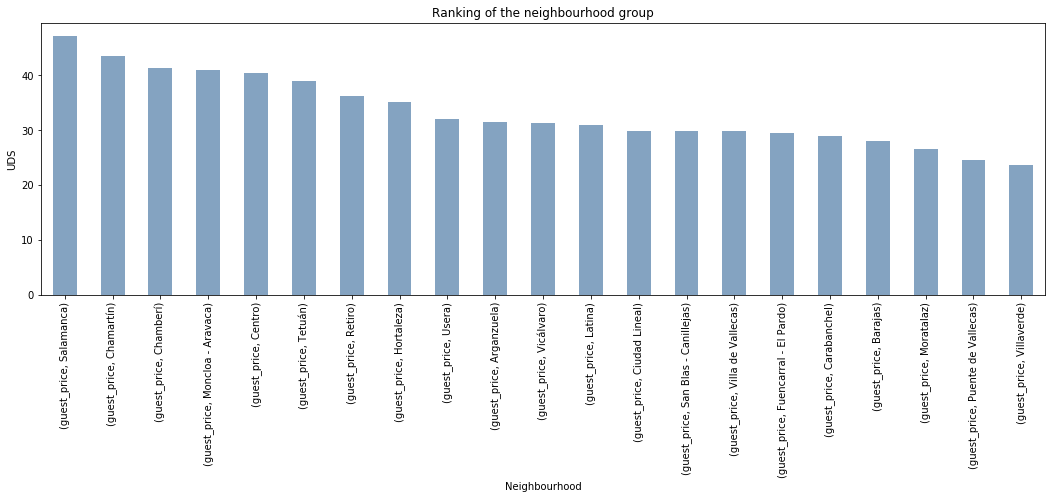

In [22]:
#plot the ranking of neighbourhood_group by price
f, ax = plt.subplots(figsize=(18,5))

df_list_short_clean[['guest_price','neighbourhood_group_cleansed']].groupby('neighbourhood_group_cleansed')\
        .mean().sort_values(by=['guest_price'],ascending=False)\
        .unstack().plot.bar(color=(0.2, 0.4, 0.6, 0.6))
        

plt.title('Ranking of the neighbourhood group')
plt.ylabel('UDS')
plt.xlabel('Neighbourhood');



In [23]:
#statics considering also the neighbourhood
l= df_list_short_clean[['guest_price','neighbourhood_group_cleansed','neighbourhood_cleansed']]\
    .groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed'])\
    .describe()
l['guest_price'].sort_values(by=['mean'],ascending=False)

count       mean  \
neighbourhood_group_cleansed neighbourhood_cleansed                          
Moratalaz                    Horcajo                        1.0  75.000000   
Usera                        Zofío                         24.0  67.795000   
Chamartín                    El Viso                       66.0  60.523788   
San Blas - Canillejas        Amposta                        4.0  59.750000   
Salamanca                    Recoletos                    285.0  57.131754   
                             Castellana                   147.0  55.797619   
Hortaleza                    Palomas                       17.0  51.458235   
Tetuán                       Castillejos                  127.0  51.436378   
Moncloa - Aravaca            Valdemarín                     2.0  50.000000   
Centro                       Justicia                    1056.0  48.589422   
Chamartín                    Hispanoamérica                88.0  48.405455   
Salamanca                    Goya                         276.0  47.243478   
Hortaleza                    Piovera                       13.0  46.942308   
Chamartín                    Nueva España                  59.0  46.621017   
Moncloa - Aravaca            El Plantío                     2.0  46.130000   
Latina                       Cuatro Vientos                 4.0  46.125000   
Chamberí                     Arapiles                     140.0  45.392071   
                             Rios Rosas                   138.0  45.081522   
Fuencarral - El Pardo        El Pardo                       2.0  45.000000   
Ciudad Lineal                Costillares                   27.0  44.886296   
Centro                       Universidad                 1798.0  43.889027   
Moncloa - Aravaca            Casa de Campo                 96.0  42.778021   
                             Argüelles                    290.0  42.529069   
Chamberí                     Almagro                      152.0  42.499868   
Retiro                       Jerónimos                    104.0  42.191058   
Salamanca                    Lista                        153.0  41.634510   
Chamberí                     Trafalgar                    291.0  40.232405   
Centro                       Sol                         1345.0  39.871822   
                             Cortes                       917.0  39.624755   
                             Palacio                     1460.0  39.535295   
...                                                         ...        ...   
Barajas                      Timón                         38.0  27.230263   
Moratalaz                    Marroquina                    15.0  26.766667   
Puente de Vallecas           Numancia                     116.0  26.655603   
Barajas                      Casco Histórico de Barajas    23.0  26.565217   
Ciudad Lineal                Pueblo Nuevo                  68.0  26.435000   
Latina                       Aguilas                       24.0  26.250000   
Fuencarral - El Pardo        Peñagrande                    48.0  26.135833   
Hortaleza                    Pinar del Rey                 42.0  25.684762   
Usera                        San Fermín                    32.0  25.277812   
Ciudad Lineal                Concepción                    61.0  25.230820   
Carabanchel                  Abrantes                      15.0  25.138667   
                             Vista Alegre                  69.0  24.436087   
Villaverde                   Los Rosales                   27.0  24.161111   
Usera                        Moscardó                      66.0  24.061818   
Villaverde                   San Andrés                    31.0  23.967742   
Puente de Vallecas           Palomeras Bajas               48.0  23.966250   
                             San Diego                    127.0  23.176929   
Barajas                      Aeropuerto                    13.0  23.096154   
Puente de Vallecas           Entrevías                     25.0  23.078400   
Vi

Now I a going to explore the host profiles. First le't see the number of accommodations per host.

For that, I am going to make a pie plot in porcentage 

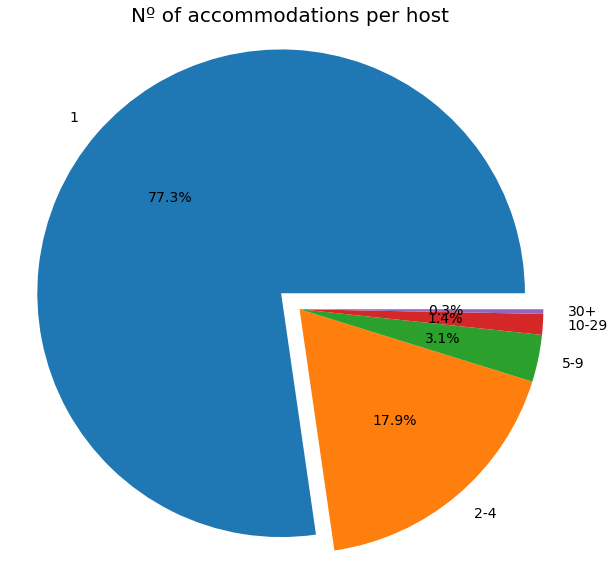

In [24]:
counts= df_list_short['host_id'].value_counts()
counts_df= pd.DataFrame({'id_host':counts.index, 'count':counts.values})

#to create bins of the number of houses
counts_df['bins'] = pd.cut(counts_df['count'],bins=[0,1,4,9,29,300], labels=["1","2-4","5-9","10-29","30+"])

#create a new dataframe with the value_counts of each bin 
a = counts_df['bins'].value_counts()
labels=["1","2-4","5-9","10-29","30+"]

#plot the pie chart
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 20
fig1, ax1 = plt.subplots(figsize=(10,10))
explode = (0.1, 0.0, 0.0, 0.0, 0.0)  
ax1.pie(a,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,textprops={'fontsize': 14})
ax1.set_title(label="Nº of accommodations per host")
ax1.axis('equal');

Here we can see that 77% of the hosts only have one accommodation to rent

Now I am going to see how many accommodation are in each bin

In [25]:
df_count_accom= counts_df.groupby('bins')['count'].sum()
df_count_accom

bins
1        7536
2-4      4279
5-9      1912
10-29    2107
30+      1822
Name: count, dtype: int64

In [26]:
counts_df.head(5)

,count,id_host,bins
0,216,102947901,30+
1,104,28038703,30+
2,92,99018982,30+
3,86,159558182,30+
4,86,32046323,30+


As we can see, bin = 1 represents about 42% of the total accommodation registred and 10% are in hands of people with more than 30 houses. That means that 0,3% of the guests have 10% of the accommodation registred while 77% of the guests have  only about 40%.

Now I am going to break the data down further looking at the type of accommodation

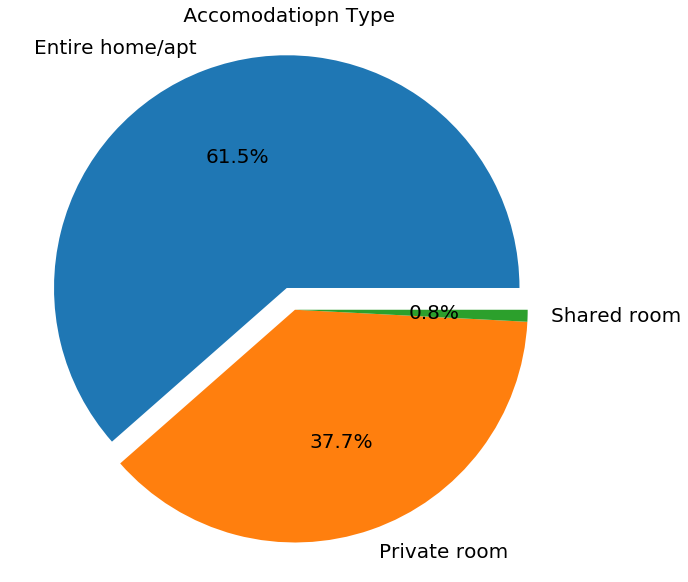

In [27]:
one_acc=counts_df[counts_df['count']==1]
lis=list(one_acc['id_host'])
type_accom= df_list_short[df_list_short['host_id'].isin(lis)]['room_type'].value_counts()
acc_df= pd.DataFrame({'id_host':type_accom.index, 'count':type_accom.values})


#mpl.rcParams['axes.titlesize'] = 25
#mpl.rcParams['font.size'] = 20
fig1, ax1 = plt.subplots(figsize=(10,10))
explode = (0.1, 0.0, 0.0)  
ax1.pie(type_accom,explode=explode,labels=type_accom.index, autopct='%1.1f%%',shadow=False,textprops={'fontsize': 20})
ax1.set_title(label=" Accomodatiopn Type ")
ax1.axis('equal');

In [28]:
most_acc=counts_df[counts_df['bins']=='30+']
lis_most=list(most_acc['id_host'])
lis_most

[102947901,
 28038703,
 99018982,
 159558182,
 32046323,
 65068845,
 206349691,
 3566146,
 30047693,
 37291567,
 15192229,
 1408525,
 107141654,
 65190950,
 5542111,
 51564174,
 40877988,
 28786243,
 117751530,
 117750911,
 21514948,
 54310958,
 112373304,
 9885245,
 100336740,
 157114944,
 27526991,
 36963267,
 105663223,
 596469]

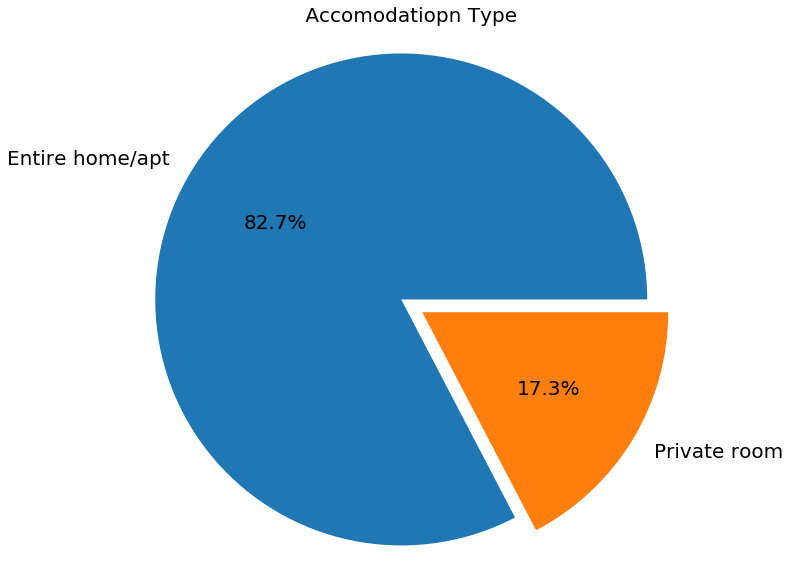

In [29]:
most_acc=counts_df[counts_df['bins']=='30+']
lis_most=list(most_acc['id_host'])
type_accom= df_list_short[df_list_short['host_id'].isin(lis_most)]['room_type'].value_counts()
acc_df= pd.DataFrame({'id_host':type_accom.index, 'count':type_accom.values})


#mpl.rcParams['axes.titlesize'] = 25
#mpl.rcParams['font.size'] = 20
fig1, ax1 = plt.subplots(figsize=(10,10))
explode = (0.1, 0.0)  
ax1.pie(type_accom,labels=type_accom.index,explode=explode, autopct='%1.1f%%',shadow=False,textprops={'fontsize': 20})
ax1.set_title(label=" Accomodatiopn Type ")
ax1.axis('equal');

**Is there any way to estimate the renting price based on the other characteristcs?**

We are going to explore again the variables in order to know which one could be useful for our model.

In [30]:
df_list_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17656 entries, 0 to 17655
Data columns (total 35 columns):
id                              17656 non-null int64
host_id                         17656 non-null int64
listing_url                     17656 non-null object
neighbourhood_cleansed          17656 non-null object
neighbourhood_group_cleansed    17656 non-null object
latitude                        17656 non-null float64
longitude                       17656 non-null float64
property_type                   17656 non-null object
room_type                       17656 non-null object
accommodates                    17656 non-null int64
bathrooms                       17643 non-null float64
bedrooms                        17651 non-null float64
beds                            17602 non-null float64
bed_type                        17656 non-null object
amenities                       17656 non-null object
square_feet                     320 non-null float64
price                     

In [31]:
#features to be remove
features_to_delete=['id','host_id','listing_url','listing_url','latitude','longitude','amenities','accommodates'\
                    ,'square_feet','security_deposit','cleaning_fee','extra_people','number_of_reviews','guest_price','beds']

In [32]:
#remove the columns selected

df_list_short_model=df_list_short.drop(columns=features_to_delete)

In [33]:
df_list_short_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17656 entries, 0 to 17655
Data columns (total 21 columns):
neighbourhood_cleansed          17656 non-null object
neighbourhood_group_cleansed    17656 non-null object
property_type                   17656 non-null object
room_type                       17656 non-null object
bathrooms                       17643 non-null float64
bedrooms                        17651 non-null float64
bed_type                        17656 non-null object
price                           17656 non-null float64
guests_included                 17656 non-null float64
minimum_nights                  17656 non-null int64
maximum_nights                  17656 non-null int64
review_scores_rating            14145 non-null float64
review_scores_accuracy          14142 non-null float64
review_scores_cleanliness       14145 non-null float64
review_scores_checkin           14139 non-null float64
review_scores_communication     14143 non-null float64
review_scores_locati

### Missing values study###

-**Bathrooms:** There is 13 missing values so I am going to fill them with the actual values taken from the listing url

In [34]:
df_list_short[df_list_short['bathrooms'].isnull()==True]

,id,host_id,listing_url,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,host_is_superhost,guest_price
22,76617,368907,https://www.airbnb.com/rooms/76617,Universidad,Centro,40.42791,-3.70999,Apartment,Entire home/apt,5,...,9.0,9.0,10.0,9.0,9.0,8.0,strict_14_with_grace_period,0.29,f,34.00
61,183435,877571,https://www.airbnb.com/rooms/183435,Justicia,Centro,40.42396,-3.69545,Apartment,Entire home/apt,8,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,f,89.00
79,229664,1130651,https://www.airbnb.com/rooms/229664,Embajadores,Centro,40.40881,-3.70092,Apartment,Entire home/apt,3,...,9.0,8.0,9.0,9.0,9.0,8.0,moderate,4.82,f,27.50
223,536574,447969,https://www.airbnb.com/rooms/536574,Delicias,Arganzuela,40.39465,-3.69329,House,Entire home/apt,10,...,6.0,6.0,5.0,8.0,6.0,6.0,moderate,0.06,f,7.78
228,541406,2661721,https://www.airbnb.com/rooms/541406,Costillares,Ciudad Lineal,40.46927,-3.66467,House,Entire home/apt,6,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,f,300.00
304,668753,3385307,https://www.airbnb.com/rooms/668753,Trafalgar,Chamberí,40.43143,-3.70215,Apartment,Private room,1,...,10.0,10.0,10.0,10.0,10.0,9.0,moderate,1.10,f,45.00
417,814647,4159117,https://www.airbnb.com/rooms/814647,Salvador,San Blas - Canillejas,40.44167,-3.63375,House,Private room,2,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN,f,30.00
462,867286,2136244,https://www.airbnb.com/rooms/867286,Palacio,Centro,40.41537,-3.71109,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.34,t,18.00
467,870153,2956210,https://www.airbnb.com/rooms/870153,Valdezarza,Moncloa - Aravaca,40.46889,-3.72466,Apartment,Private room,1,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,f,85.00
564,1044902,5751753,https://www.airbnb.com/rooms/1044902,Ciudad Universitaria,Moncloa - Aravaca,40.46493,-3.75068,House,Private room,16,...,NaN,NaN,NaN,NaN,NaN,NaN,strict_14_with_grace_period,NaN,f,5.31


In [35]:
#fill the NaN values with the actual values
df_list_short_model.loc[df_list_short_model['bathrooms'][df_list_short_model['bathrooms'].isnull()==True].\
                        index,'bathrooms']=[1,2,1,2,4,1,1,1,1,5,1,1,1]

In [36]:
#test
df_list_short_model['bathrooms'][df_list_short_model['bathrooms'].isnull()==True]

Series([], Name: bathrooms, dtype: float64)

-**Bedrooms:** There are 5 mssing values so we are going to fill them with the actual value. In this case it is because they are studios but we will consider them as a one room apartment. 

In [37]:
#fill the NaN values with the actual values
df_list_short_model.loc[df_list_short_model['bedrooms'][df_list_short_model['bedrooms'].isnull()==True].\
                        index, 'bedrooms']=[1,1,1,1,1]

In [38]:
#test
df_list_short_model[df_list_short_model['bedrooms'].isnull()==True]['bedrooms']

Series([], Name: bedrooms, dtype: float64)

-**Reviews:** After checking the missing values in the reviews we can assume that most of them are becasue they have not been reviewed yes. Therefore we are going to fill the NaN values withe the mean of all the reviews.

In [39]:
# fill all NaN with the mean of each column

df_list_short_model['review_scores_rating'].fillna(df_list_short_model['review_scores_rating'].mean(),inplace=True)
df_list_short_model['review_scores_accuracy'].fillna(df_list_short_model['review_scores_accuracy'].mean(),inplace=True)
df_list_short_model['review_scores_cleanliness'].fillna(df_list_short_model['review_scores_cleanliness'].mean(),inplace=True)
df_list_short_model['review_scores_checkin'].fillna(df_list_short_model['review_scores_checkin'].mean(),inplace=True)
df_list_short_model['review_scores_communication'].fillna(df_list_short_model['review_scores_communication'].mean(),inplace=True)
df_list_short_model['review_scores_location'].fillna(df_list_short_model['review_scores_location'].mean(),inplace=True)
df_list_short_model['review_scores_value'].fillna(df_list_short_model['review_scores_value'].mean(),inplace=True)
df_list_short_model['reviews_per_month'].fillna(df_list_short_model['reviews_per_month'].mean(),inplace=True)

In [40]:
#test
df_list_short_model[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',\
                            'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']].isnull().any()

review_scores_rating           False
review_scores_accuracy         False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_value            False
reviews_per_month              False
dtype: bool

**host_is_superhost:** In this case we have got 4 missing values so we are going to fill them with f intead of delete them

In [41]:
df_list_short_model['host_is_superhost'].fillna('f',inplace=True)

In [42]:
#test
df_list_short_model['host_is_superhost'].isnull().any()

False

In [43]:
#check whether trhere is any NaN values after processing
df_list_short_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17656 entries, 0 to 17655
Data columns (total 21 columns):
neighbourhood_cleansed          17656 non-null object
neighbourhood_group_cleansed    17656 non-null object
property_type                   17656 non-null object
room_type                       17656 non-null object
bathrooms                       17656 non-null float64
bedrooms                        17656 non-null float64
bed_type                        17656 non-null object
price                           17656 non-null float64
guests_included                 17656 non-null float64
minimum_nights                  17656 non-null int64
maximum_nights                  17656 non-null int64
review_scores_rating            17656 non-null float64
review_scores_accuracy          17656 non-null float64
review_scores_cleanliness       17656 non-null float64
review_scores_checkin           17656 non-null float64
review_scores_communication     17656 non-null float64
review_scores_locati

As we can see, we do not have any missing value 

### Univariable analysis ###
- **Numerical variables**

In [44]:
df_list_short_model.describe()

,bathrooms,bedrooms,price,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,17656.00000,17656.000000,17656.000000,17656.000000,17656.000000,1.765600e+04,17656.000000,17656.000000,17656.000000,17656.000000,17656.000000,17656.000000,17656.000000,17656.000000
mean,1.30678,1.356932,95.712959,2.281604,4.102968,7.707775e+03,92.488653,9.523335,9.384588,9.643398,9.667468,9.629926,9.199024,2.006072
std,0.63721,0.874854,309.586533,1.704939,17.169838,8.403632e+05,7.904630,0.788899,0.858425,0.735783,0.709650,0.644658,0.842954,1.751441
min,0.00000,0.000000,8.000000,1.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,1.00000,1.000000,35.000000,1.000000,1.000000,6.200000e+01,91.000000,9.000000,9.000000,9.643398,9.667468,9.629926,9.000000,0.640000
50%,1.00000,1.000000,60.000000,2.000000,2.000000,1.125000e+03,93.000000,10.000000,9.384588,10.000000,10.000000,10.000000,9.199024,2.006072
75%,1.50000,2.000000,90.000000,3.000000,3.000000,1.125000e+03,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.590000
max,9.00000,12.000000,9999.000000,50.000000,700.000000,1.111111e+08,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,20.030000


We can see in the above summary that the minimun bedroom is 0, and after cheching in the urls we can assume that those are studios so one room would fit better. Otherwise it could also affect our model.

In [45]:
#replce 0 by 1 bedroom
df_list_short_model['bedrooms']= df_list_short_model['bedrooms'].replace(0,1)

In [46]:
#test
df_list_short_model[df_list_short_model['bedrooms']==0]

,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms,bedrooms,bed_type,price,guests_included,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,host_is_superhost


Now let's explore further the variable price again

In [47]:
print(df_list_short_model[df_list_short_model['price']>700].shape)
print(df_list_short_model[df_list_short_model['price']<15].shape)

(218, 21)
(197, 21)


In [48]:
#let's see where those high prices belong to
df_list_short_model[df_list_short_model['price']>700]['neighbourhood_group_cleansed'].value_counts()

Centro                   120
Tetuán                    24
Latina                    22
Chamberí                  13
Usera                     12
Salamanca                  8
Retiro                     6
Moncloa - Aravaca          4
Fuencarral - El Pardo      3
Arganzuela                 3
Chamartín                  2
Hortaleza                  1
Name: neighbourhood_group_cleansed, dtype: int64

Since many of those values could be errors we are going to delete those rows

In [49]:
df_list_short_model=df_list_short_model[(df_list_short_model['price'] > 15) & (df_list_short_model['price'] < 700)]

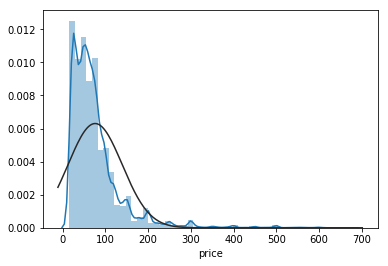

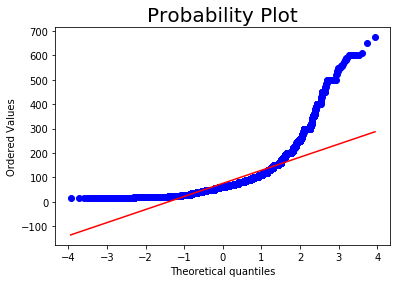

In [50]:
#plot the price distribution 

from scipy.stats import norm
from scipy import stats

sns.distplot(df_list_short_model['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_list_short_model['price'], plot=plt)

As the distributin is clearly skewed we are going to apply log scale to price

In [51]:
df_list_short_model['log_price']= np.log(df_list_short_model['price'])

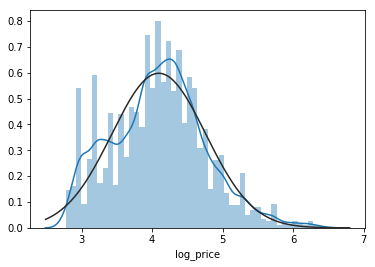

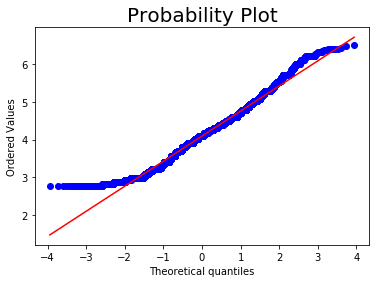

In [52]:
#transformed histogram and normal probability plot

sns.distplot(df_list_short_model['log_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_list_short_model['log_price'], plot=plt)

It looks much better!!! so let's proceed to remove price variable.

In [53]:
#drop price column
df_list_short_model=df_list_short_model.drop(columns=['price'])

To finish with the nuemrical varibles. We are going to remove the maximun nights because as we can see in the summary we have very high figures and from my point of view  it doen't really matter when you book an accomodation (maybe a bit in long term rents) 

In [54]:
#drop price column
df_list_short_model=df_list_short_model.drop(columns=['maximum_nights'])

Let's see a heatmap with the correaltin of all the numercial features.

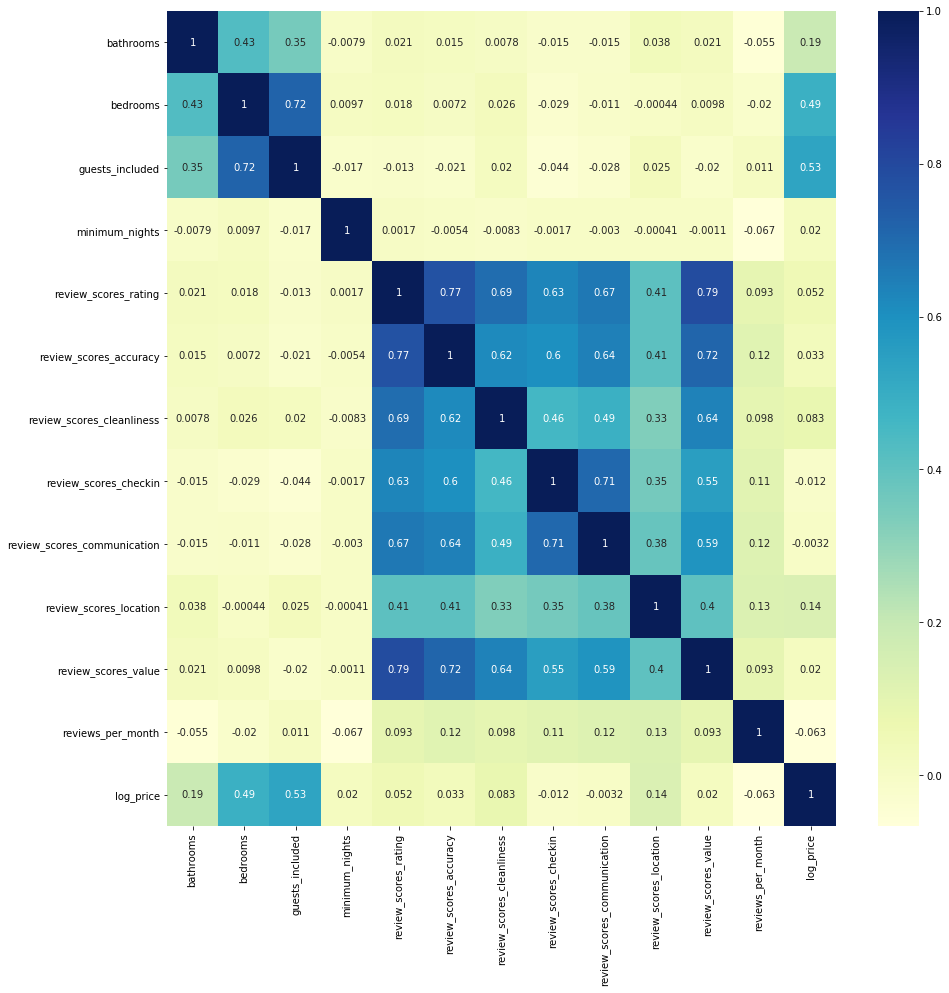

In [55]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df_list_short_model.corr(), annot=True, cmap="YlGnBu");

In this heatmap of the correlations we can see that obviously there is correlation between review scores and also guests, bedrooms bathrooms and so on. However there is no lineal correlation between price and others fetures but we can get something in the log_price ( guests, bedrooms and bathrooms which makes sence by the way)

- **Non-Numeric Variables**

For the moment, and due to the fact that neighbourhood_cleansed would increase too much the number of columns (when performing one-hot encoding) we arwe going to drop it from the dataset. we will see later whether we have to use it

In [56]:
#drop price column
df_list_short_model=df_list_short_model.drop(columns=['neighbourhood_cleansed']) 

We can observe that the variable host_is_superhost is boolean so we are going to replace t by 1 and f by 0

In [57]:
df_list_short_model['host_is_superhost'].replace({'f': 0, 't': 1},inplace= True)

And finally, let's one-hot encode the rest of non-numerical variables 

In [58]:
#first we split the data 
df_final = df_list_short_model.drop(columns=['log_price'])
price = df_list_short_model['log_price']

In [59]:
df_final 

,neighbourhood_group_cleansed,property_type,room_type,bathrooms,bedrooms,bed_type,guests_included,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,host_is_superhost
0,Chamartín,Apartment,Private room,1.0,1.0,Real Bed,2.0,3,98.000000,10.000000,10.000000,9.000000,10.000000,9.000000,10.000000,flexible,0.550000,0
1,Latina,Apartment,Private room,1.0,1.0,Real Bed,1.0,4,92.000000,9.000000,9.000000,10.000000,10.000000,8.000000,9.000000,strict_14_with_grace_period,0.610000,0
2,Centro,Apartment,Entire home/apt,1.0,1.0,Real Bed,2.0,5,100.000000,8.000000,8.000000,10.000000,10.000000,10.000000,10.000000,strict_14_with_grace_period,0.040000,0
3,Centro,Apartment,Entire home/apt,1.0,2.0,Real Bed,4.0,3,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,moderate,0.570000,1
4,Arganzuela,House,Private room,1.0,1.0,Real Bed,1.0,2,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,strict_14_with_grace_period,1.170000,0
5,Centro,Apartment,Entire home/apt,1.0,1.0,Real Bed,2.0,3,93.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,moderate,1.470000,0
6,Arganzuela,Hostel,Private room,0.0,1.0,Pull-out Sofa,1.0,2,92.488653,9.523335,9.384588,9.643398,9.667468,9.629926,9.199024,strict_14_with_grace_period,2.006072,0
7,Centro,Loft,Entire home/apt,1.0,1.0,Real Bed,1.0,3,88.000000,8.000000,9.000000,9.000000,9.000000,10.000000,9.000000,moderate,0.170000,0
8,Centro,Apartment,Entire home/apt,1.0,1.0,Real Bed,3.0,3,92.000000,10.000000,9.000000,9.000000,10.000000,10.000000,9.000000,strict_14_with_grace_period,1.070000,0
9,Centro,Apartment,Entire home/apt,1.0,1.0,Real Bed,3.0,3,92.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,moderate,0.290000,0


In [60]:
cols=['neighbourhood_group_cleansed','property_type','room_type','bed_type','cancellation_policy','host_is_superhost']
for each in cols:
    df_final = pd.concat([df_final.drop(each, axis=1), pd.get_dummies(df_final[each], drop_first=True)], axis=1)

In [100]:
df_final.shape

(17078, 69)

In [102]:
columns_name = list(df_final)

#scaling the values
scaler=MinMaxScaler()
df_final_scaled=scaler.fit_transform(df_final)
df_clean_scaler= pd.DataFrame(df_final_scaled, columns = columns_name)

### Modeling ###

After processing the data we are going to make some models using sklearn. The idea is to make three models and pick the best one based on the score achived.

In [104]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA

In [76]:
#scaling the values
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df_final)

#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(df_scaled,price, test_size = .30, random_state=42)

#model with Suport vector machine (kernel rbf)
model = SVR() # Instantiate
model.fit(X_train, y_train) #Fit
       

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
#model with Linear regression
model_lr = LinearRegression() # Instantiate
model_lr.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
#model with Gaussian Process
kernel = DotProduct() + WhiteKernel()
model_g = GaussianProcessRegressor(kernel=kernel,
            random_state=0).fit(X_train, y_train)

In order to have an idea about the explained variance per principal components I am going to do a Principal Components Analysis

In [105]:
#apply pca in 69 components the features

pca = PCA(69)
X_pca = pca.fit_transform(df_clean_scaler)

In [106]:
# Investigate the variance accounted for by each principal component.
#function to plot the principal components as well as the cumulative variance
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 15))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    count=0
    for i in range(num_components):
        count+=1
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
        if count==3:
            break
        
        
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')


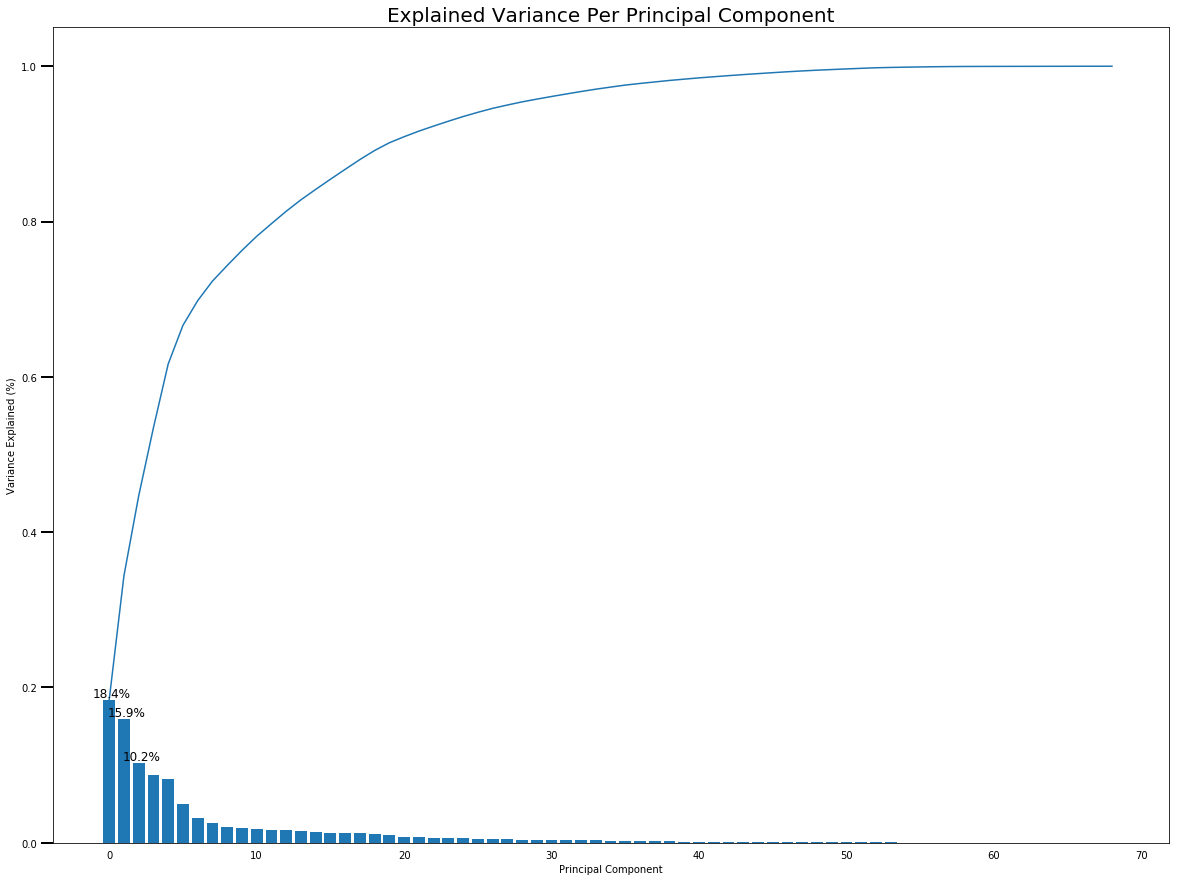

In [107]:
scree_plot(pca)

### Evaluation ###

In [96]:
#Validation on Suport Vector Machines
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_score = r2_score(y_train, train_predict)
test_score = r2_score(y_test, test_predict)

print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5817378556554036.  The rsquared on the test data was 0.5630092729398775.


In [88]:
#Valuation on linear regresion model
train_predict_lr = model_lr.predict(X_train)
test_predict_lr = model_lr.predict(X_test)

train_score_lr = r2_score(y_train, train_predict_lr)
test_score_lr = r2_score(y_test, test_predict_lr)

print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score_lr, test_score_lr))

The rsquared on the training data was 0.5879804994006108.  The rsquared on the test data was 0.5609059145615738.


In [91]:
#Valuation on linear regresion model
train_predict_g = model_g.predict(X_train)
test_predict_g = model_g.predict(X_test)

train_score_g = r2_score(y_train, train_predict_g)
test_score_g = r2_score(y_test, test_predict_g)

print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score_g, test_score_g))

The rsquared on the training data was 0.5866979393687259.  The rsquared on the test data was 0.5627634983850358.


We can see that we have got similar R2 values for all the models